## Analyzing the Cleaned Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = "C:\\Users\\Administrator\\DS Project Portfolio\\cleaned_IMDb_dataset.csv"
data = pd.read_csv(file_path, encoding='latin1')
data.sample(5)

,IMBD title ID,Original title,Release year,Genre,Duration (mins),Country,Content Rating,Director,Income ($),Votes,Score
74,tt0105236,Reservoir Dogs,1992-10-09,"Crime, Drama, Thriller",99.0,USA,R,Quentin Tarantino,2889963.0,896551.0,7.9
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142.0,USA,R,Frank Darabont,28815245.0,2278845.0,9.3
43,tt0054215,Psycho,1960-10-28,"Horror, Mystery, Thriller",109.0,USA,R,Alfred Hitchcock,32008644.0,586765.0,8.3
41,tt0253474,The Pianist,2002-10-25,"Biography, Drama, Music",150.0,UK,R,Roman Polanski,120072577.0,707942.0,8.4
93,tt2106476,Jagten,2012-11-22,Drama,115.0,Denmark,R,Thomas Vinterberg,15843274.0,269616.0,7.5


1. **Score vs. Income Correlation analysis** 

Let's examines the relationship between a movie's audience rating (Score) and its financial performance (income). The goal is to determine whether higher-rated movies tend to earn more revenue or if there's a disconnect between critical acclaim and box office success. This analysis helps in understanding the extent to which audience satisfaction influences a movie's profitability.

#### Exploratory Data Analysis (EDA) for the Score vs. Income Correlation.

- Summary Statistics for 'Score' and 'Income ($)'

In [7]:
summary_stats = data[['Score', 'Income ($)']].describe()
print(summary_stats)

            Score    Income ($)
count  100.000000  1.000000e+02
mean     8.239000  2.991255e+08
std      0.449892  4.360335e+08
min      7.400000  5.760000e+02
25%      7.900000  2.374174e+07
50%      8.300000  1.093370e+08
75%      8.600000  4.052080e+08
max      9.300000  2.797801e+09


- Visualizing Distributions

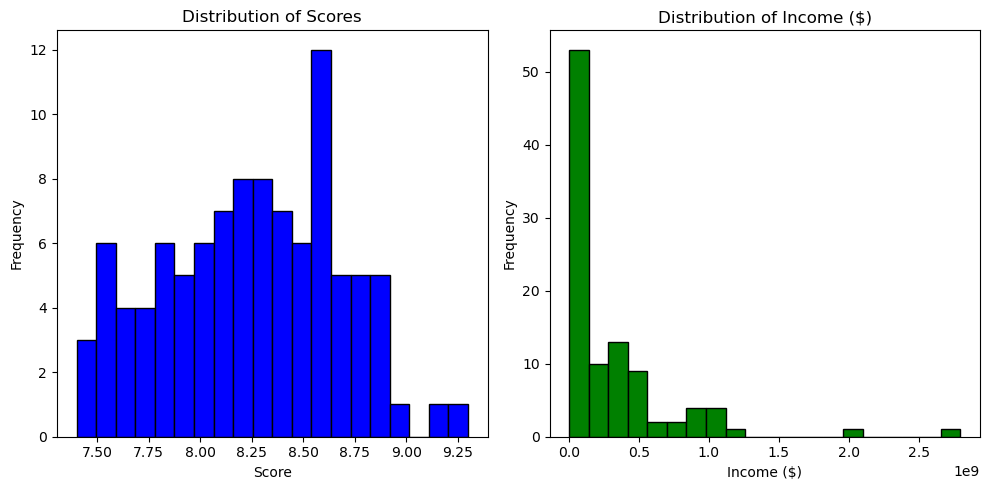

In [8]:
# Histogram for Score
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Score'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for Income ($)
plt.subplot(1, 2, 2)
plt.hist(data['Income ($)'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Income ($)')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- Scatter plot for Score vs. Income ($)

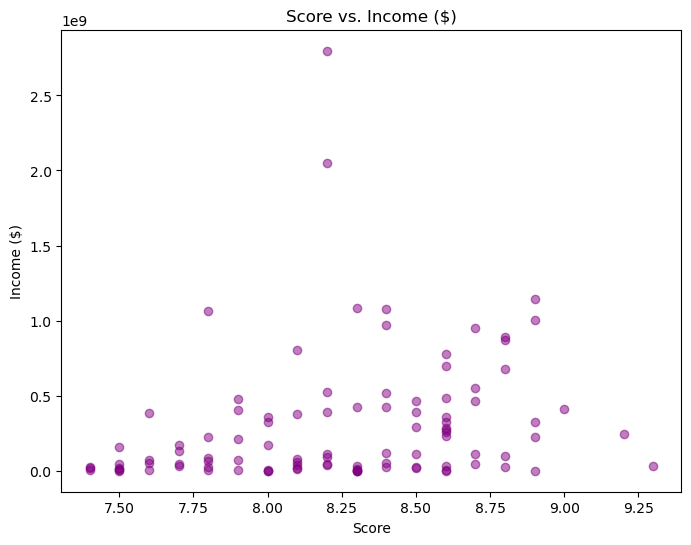

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Score'], data['Income ($)'], color='purple', alpha=0.5)
plt.title('Score vs. Income ($)')
plt.xlabel('Score')
plt.ylabel('Income ($)')
plt.show()

- There no correlation between the Score of the movies and the Income gotten from it. 

**Possible Explanations:**
1. **Niche Audience:** Some movies with high scores might cater to a niche audience, leading to lower income despite good ratings.
2. **Marketing and Distribution:** Movies with lower scores might still generate significant income due to strong marketing, wide distribution, or being part of a popular franchise.
3. **Budget Constraints:** Low-budget films, which often have lower income, might still receive good scores if they are critically acclaimed.

### Further Analysis for this
Let's explore other factors that might influence income, such as Genre, Country, or Content Rating, to see if there’s a more complex interaction affecting income.

1. Income by Genre Analysis
- **Objective:** Determine which genres are associated with higher or lower income.

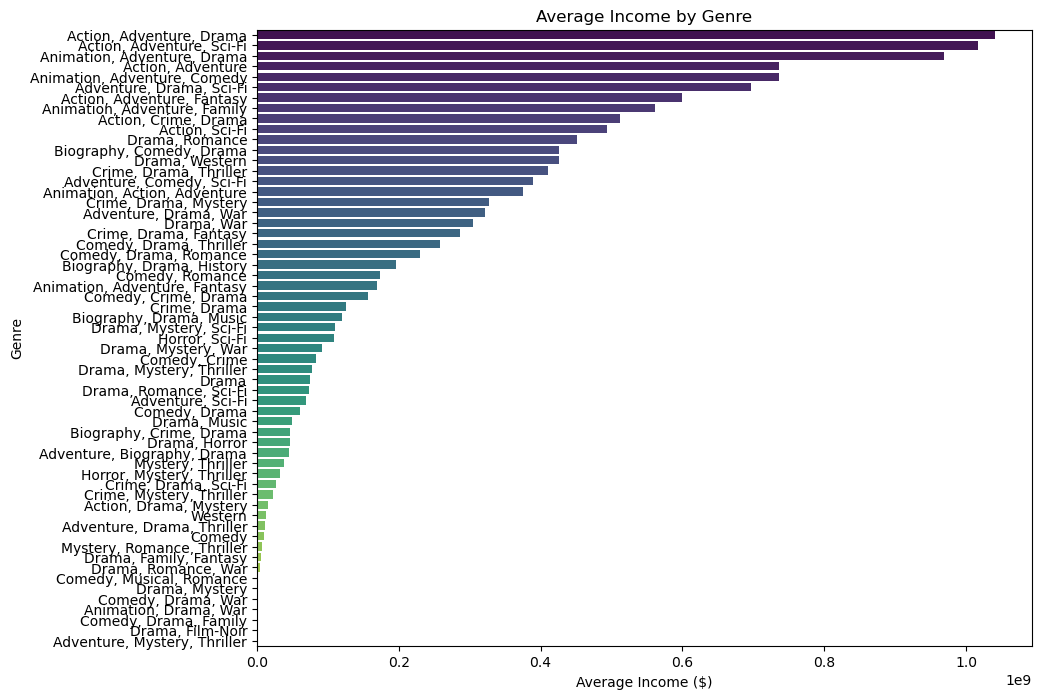

In [10]:
# Grouping by Genre and calculating the average income
genre_income = data.groupby('Genre')['Income ($)'].mean().sort_values(ascending=False)

# Plotting the average income by Genre
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_income.values, y=genre_income.index, palette='viridis')
plt.title('Average Income by Genre')
plt.xlabel('Average Income ($)')
plt.ylabel('Genre')
plt.show()

**Interpretation:**
- **Top-Earning Genres:** Action, Adventure, Drama
- **Low-Earning Genres:** Adventure, Mystery, Thriller

2. Income by Country
- **Objective:** Identify if certain countries produce movies with higher incomes.


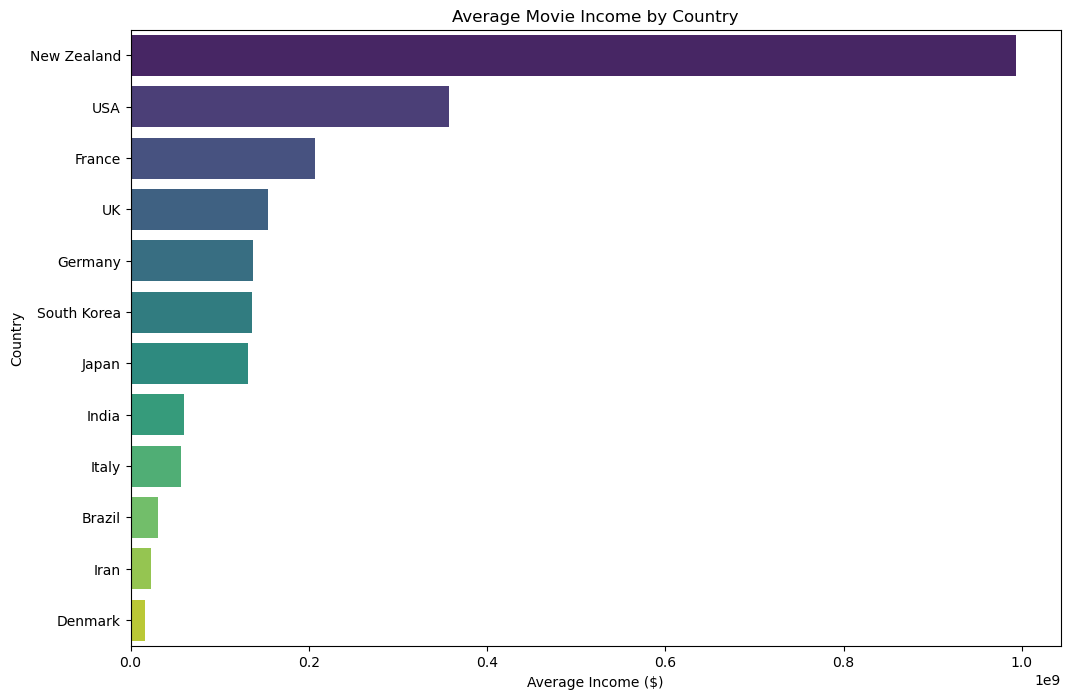

In [11]:
# Group by 'Country' and calculate the average income
country_income_avg = data.groupby('Country')['Income ($)'].mean().sort_values(ascending=False)

# Plotting the average income by Country
plt.figure(figsize=(12, 8))
sns.barplot(x=country_income_avg.values, y=country_income_avg.index, palette='viridis')
plt.title('Average Movie Income by Country')
plt.xlabel('Average Income ($)')
plt.ylabel('Country')
plt.show()


**Interpretation:**
- **Top Countries:** New Zealand, USA and France (in descending order) are the leading countries with highest returns

(The countries at the top of the chart have the highest average incomes, indicating that movies from these countries tend to perform well financially.)
- **Bottom Countries:** Denmark, Iran and Brazil (in ascending order) are the countries with least returns

(The countries at the bottom have lower average incomes, suggesting that movies from these regions might not generate as much revenue on average.)

3. Income by Content Rating

**Objective:** Examine if the Content Rating of a movie (e.g., PG, R) influences its income.


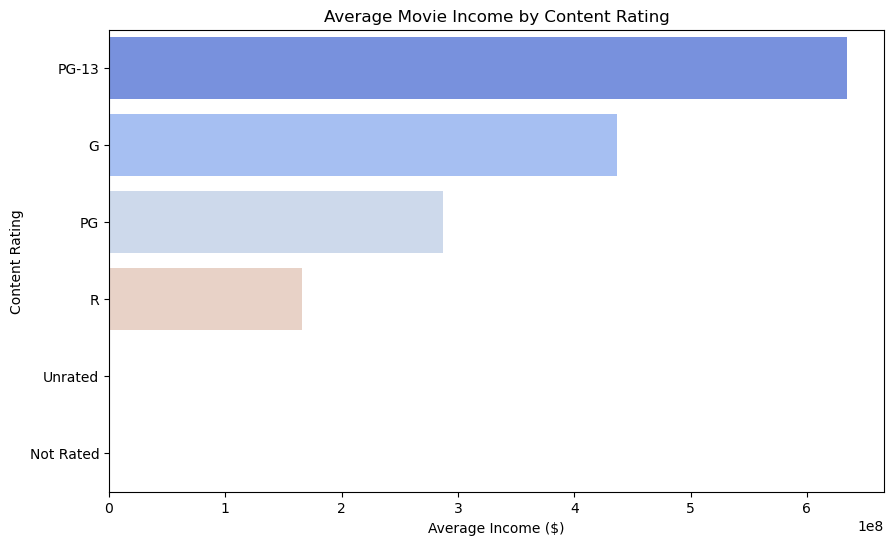

In [12]:
# Grouping by 'Content Rating' and calculating the average income
content_rating_income_avg = data.groupby('Content Rating')['Income ($)'].mean().sort_values(ascending=False)

# Plotting the average income by Content Rating
plt.figure(figsize=(10, 6))
sns.barplot(x=content_rating_income_avg.values, y=content_rating_income_avg.index, palette='coolwarm')
plt.title('Average Movie Income by Content Rating')
plt.xlabel('Average Income ($)')
plt.ylabel('Content Rating')
plt.show()


**Interpretation:**
- **Higher Average Income Ratings:** Movies rated PG-13 evidently appeals to a wider demographic, leading to higher average incomes.
- **Lower Average Income Ratings:** Movies rated R evidently have the least appeal.

4. Top-Performing Movie Genres by Revenue Across Countries

**Objective:** To identify the movie genres that generate the highest revenue in each country.

In [15]:
# Ensure no scientific notation is used for displaying numbers
pd.options.display.float_format = '{:,.2f}'.format

# Group by 'Country' and 'Genre', then sum the 'Income ($)'
grouped_data = data.groupby(['Country', 'Genre'])['Income ($)'].sum().reset_index()

# Find the genre with the highest income in each country
best_genre_per_country = grouped_data.loc[grouped_data.groupby('Country')['Income ($)'].idxmax()]

# Sort the result by 'Income ($)' in descending order
best_genre_per_country = best_genre_per_country.sort_values(by='Income ($)', ascending=False).reset_index(drop=True)
best_genre_per_country


,Country,Genre,Income ($)
0,USA,"Action, Adventure, Drama","3,263,161,740.00"
1,New Zealand,"Action, Adventure, Drama","2,981,432,817.00"
2,UK,"Action, Adventure","1,081,133,191.00"
3,France,"Biography, Comedy, Drama","426,588,510.00"
4,Japan,"Animation, Adventure, Family","355,467,056.00"
5,Germany,"Adventure, Drama, War","321,455,689.00"
6,South Korea,"Comedy, Drama, Thriller","257,604,912.00"
7,Italy,"Comedy, Drama, Romance","230,098,753.00"
8,India,"Comedy, Drama","60,262,836.00"
9,Brazil,"Crime, Drama","30,680,793.00"


### Conclusion:
The analysis highlights that certain genres, countries, and content ratings are associated with higher movie incomes. 

Action, Adventure, and Drama genres, as well as movies from New Zealand, USA, and France, generally perform better financially. 

Additionally, PG-13 rated movies have the widest appeal, leading to higher revenues. 

Furthermore, we see the the genre that generate the highest revenue in each country in the dataset.

These insights can inform decisions in film production, marketing strategies, and distribution to maximize financial success.